In [1]:
import os
import json
import numpy as np
from prettytable import PrettyTable

img_idx = None
all_scenes = ['garden', 'room', 'drjohnson', 'counter', 'playroom', 'train', 'kitchen', 'bicycle', 'stump', 'bonsai', 'truck']
m360_scenes = ['garden', 'room', 'counter', 'kitchen', 'bicycle', 'stump', 'bonsai']
db_scenes = ['drjohnson', 'playroom']
tandt_scenes = ['train', 'truck']
scenes = db_scenes

In [2]:
eval_path = './eval'
folders = os.listdir(eval_path)

metrics_dict = {}
for folder in folders:
    result_path = os.path.join(eval_path, folder, 'results.json')

    if not os.path.exists(result_path):
        continue
    if folder not in scenes:
        continue
    data = json.load(open(result_path))
    for key in data.keys():
        if key not in metrics_dict:
            metrics_dict[key] = {}
            metrics_dict[key]['name'] = []
        metrics_dict[key]['name'].append(folder)
        for metric_key in data[key].keys():
            if metric_key not in metrics_dict[key]:
                metrics_dict[key][metric_key] = []
            metrics_dict[key][metric_key].append(data[key][metric_key])

# turn metrics_dict to a PrettyTable
table = PrettyTable()
avg_dict = []
for iter in metrics_dict.keys():
    for key in metrics_dict[iter].keys():
        if key == 'name':
            metrics_dict[iter][key].append('AVERAGE')
            table.add_column(iter, metrics_dict[iter][key])
        else:
            col_data = np.array(metrics_dict[iter][key])
            avg = np.mean(col_data)
            col_data = np.append(col_data, avg)
            table.add_column(key, np.round(col_data, decimals=4))
print(table.get_string())

+------------+--------+---------+--------+-----------+--------+---------+--------+
| ours_30000 |  SSIM  |   PSNR  | LPIPS  | ours_7000 |  SSIM  |   PSNR  | LPIPS  |
+------------+--------+---------+--------+-----------+--------+---------+--------+
| drjohnson  | 0.9004 | 29.0834 | 0.2445 | drjohnson | 0.8615 | 27.0283 | 0.3328 |
|  playroom  | 0.9072 | 30.0093 | 0.2433 |  playroom | 0.8979 | 29.5556 | 0.2867 |
|  AVERAGE   | 0.9038 | 29.5463 | 0.2439 |  AVERAGE  | 0.8797 |  28.292 | 0.3097 |
+------------+--------+---------+--------+-----------+--------+---------+--------+


In [3]:
import matplotlib.pyplot as plt

scene = 'train'
img_path = os.path.join(eval_path, scene, 'test/ours_30000')
gt_path = os.path.join(img_path, 'gt')
renders_path = os.path.join(img_path, 'renders')

file_names = os.listdir(gt_path)
file_names.sort()

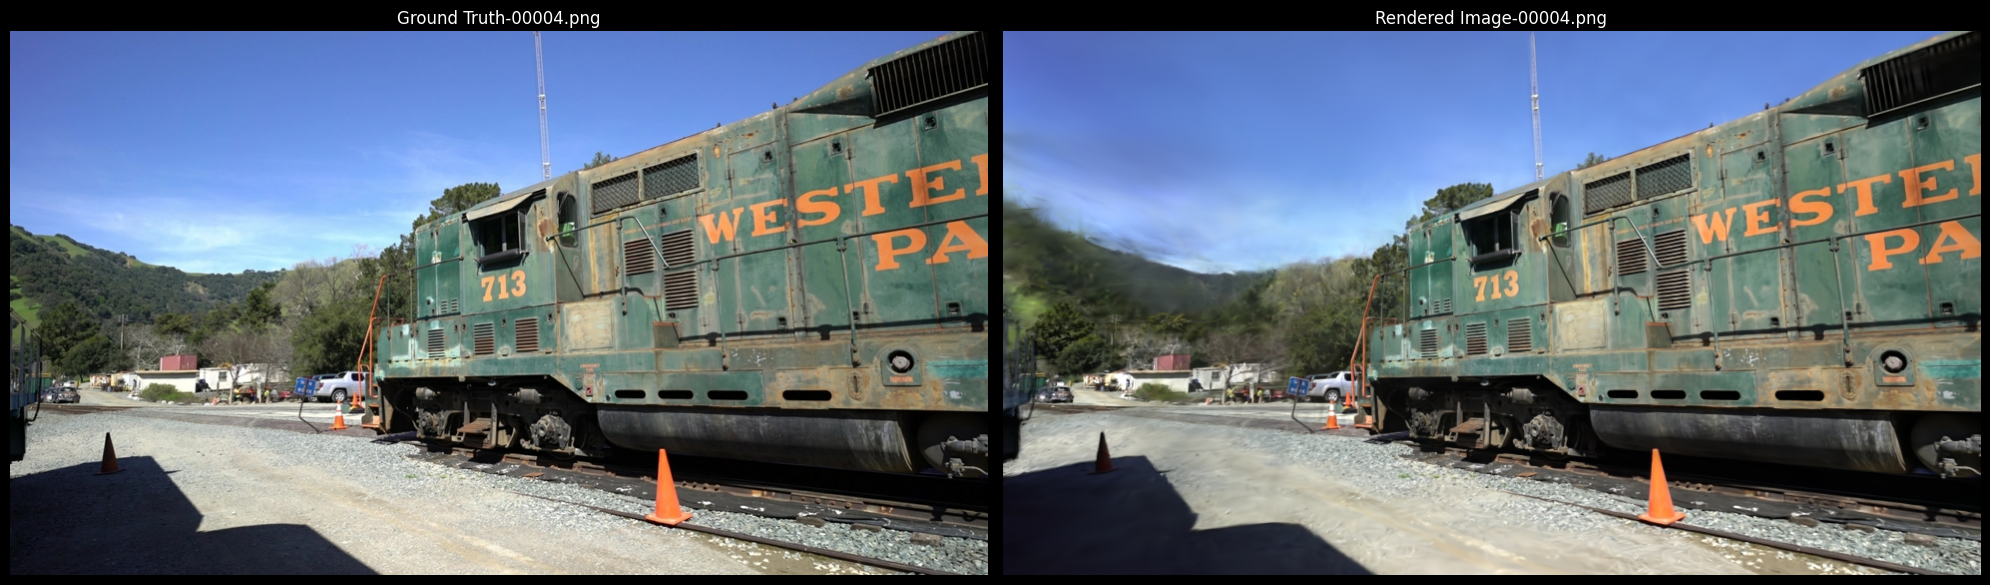

In [44]:
if img_idx is None:
    img_idx = 0
else:
    img_idx = (img_idx + 1) % len(file_names)

plt.figure(figsize=(20, 40))
gt_img = plt.imread(os.path.join(gt_path, file_names[img_idx]))
plt.subplot(1, 2, 1)
plt.imshow(gt_img)
plt.title(f'Ground Truth-{file_names[img_idx]}')
plt.axis('off')
render_img = plt.imread(os.path.join(renders_path, file_names[img_idx]))
plt.subplot(1, 2, 2)
plt.imshow(render_img)
plt.title(f'Rendered Image-{file_names[img_idx]}')
plt.axis('off')
plt.tight_layout()
plt.show()

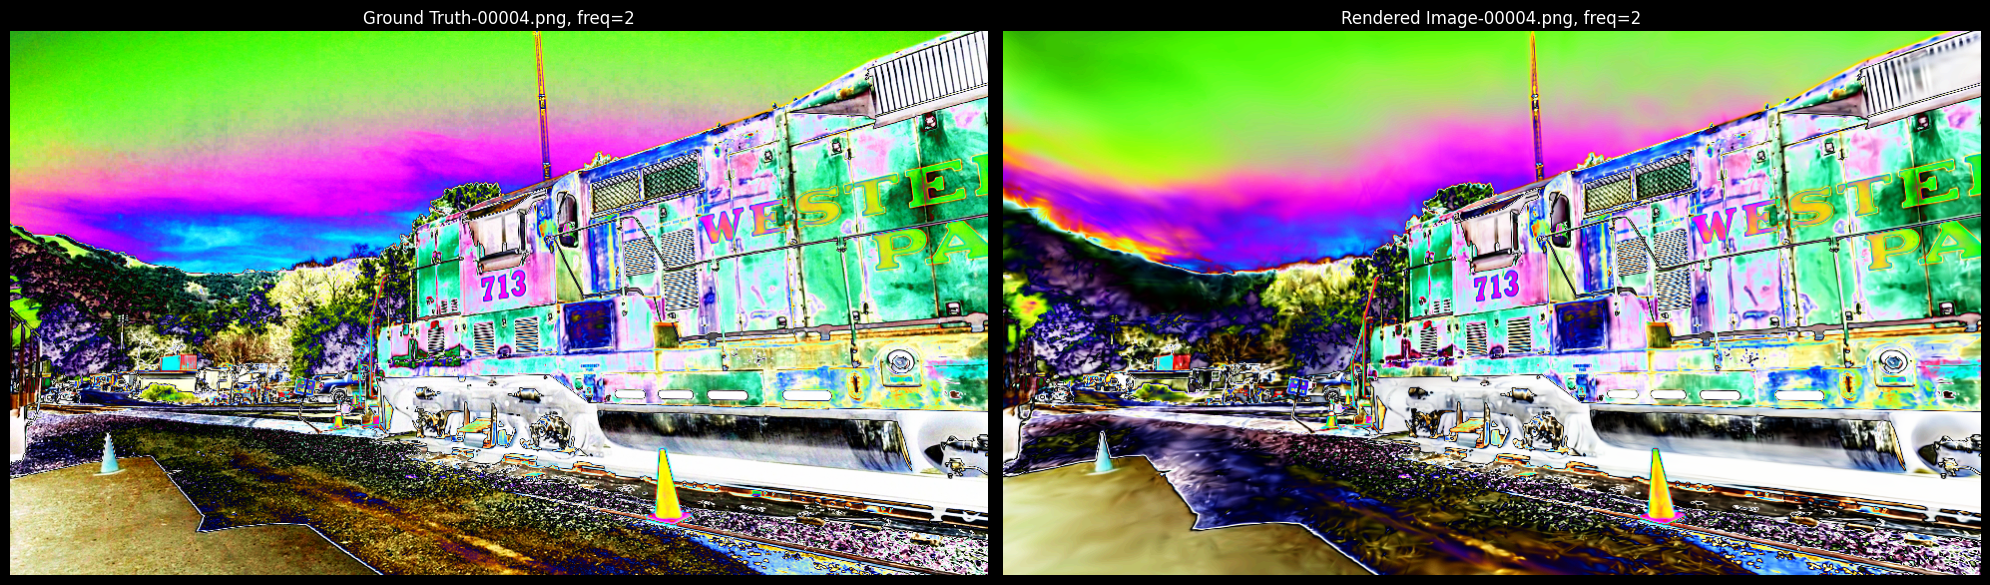

In [54]:
freq = np.power(2, 1)
gt_img_freq = (np.cos(2 * np.pi * freq * gt_img) + 1.0) / 2.0
plt.figure(figsize=(20, 40))
plt.subplot(1, 2, 1)
plt.imshow(gt_img_freq)
plt.title(f'Ground Truth-{file_names[img_idx]}, freq={freq}')
plt.axis('off')
render_img_freq = (np.cos(2 * np.pi * freq * render_img) + 1.0) / 2.0
plt.subplot(1, 2, 2)
plt.imshow(render_img_freq)
plt.title(f'Rendered Image-{file_names[img_idx]}, freq={freq}')
plt.axis('off')
plt.tight_layout()
plt.show()